In [3]:
import numpy_financial as npf
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np

In [4]:
res = npf.fv(rate=0.08, nper=5, pmt=0, pv=-1000)
print(round(res,2))

1469.33


In [5]:
print(npf.fv(rate=0, nper=3, pmt=0, pv=-100))

100.0


c:\Users\ivana\anaconda3\lib\site-packages\numpy_financial\_financial.py:130: RuntimeWarning: invalid value encountered in long_scalars
  (1 + rate*when)*(temp - 1)/rate)


In [6]:
import requests

url_link = 'https://finance.yahoo.com/quote/TSLA/profile'
r = requests.get(url_link, headers={'User-Agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'})

df = pd.read_html(r.text)
df[0]

,Name,Title,Pay,Exercised,Year Born
0,Mr. Elon R. Musk,"Technoking of Tesla, CEO & Director",NaN,23.45B,1972.0
1,Mr. Zachary John Planell Kirkhorn,Master of Coin & CFO,301.15k,3.2M,1985.0
2,Mr. Andrew D. Baglino,Sr. VP of Powertrain & Energy Engineering,301.15k,20.06M,1981.0
3,Mr. Vaibhav Taneja,Corp. Controller & Chief Accounting Officer,NaN,NaN,1978.0
4,Mr. Martin Viecha,Sr. Director for Investor Relations,NaN,NaN,NaN
5,Mr. Alan Prescott,VP of Legal,NaN,NaN,1979.0
6,Mr. Dave Arnold,Sr. Director of Global Communications,NaN,NaN,NaN
7,Brian Scelfo,Sr. Director of Corp. Devel.,NaN,NaN,NaN
8,Mr. Jeffrey B. Straubel,Sr. Advisor,NaN,NaN,1976.0
9,Mr. Franz von Holzhausen,Chief Designer,NaN,NaN,NaN


In [7]:
url_link_2 = 'https://finance.yahoo.com/quote/TSLA/analysis?p=TSLA'
r = requests.get(url_link_2, headers={'User-Agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'})
data_2 = pd.read_html(r.text)
data_2 = data_2[0]
data_2

,Earnings Estimate,Current Qtr. (Dec 2022),Next Qtr. (Mar 2023),Current Year (2022),Next Year (2023)
0,No. of Analysts,20.00,13.00,25.00,26.00
1,Avg. Estimate,1.26,1.29,4.10,5.64
2,Low Estimate,0.86,1.04,3.68,4.08
3,High Estimate,1.51,1.80,4.46,7.97
4,Year Ago EPS,0.85,1.07,2.26,4.10


In [8]:
data_2[data_2['Earnings Estimate']=='Avg. Estimate']

,Earnings Estimate,Current Qtr. (Dec 2022),Next Qtr. (Mar 2023),Current Year (2022),Next Year (2023)
1,Avg. Estimate,1.26,1.29,4.1,5.64


In [9]:
data_2.iloc[1:2]

,Earnings Estimate,Current Qtr. (Dec 2022),Next Qtr. (Mar 2023),Current Year (2022),Next Year (2023)
1,Avg. Estimate,1.26,1.29,4.1,5.64


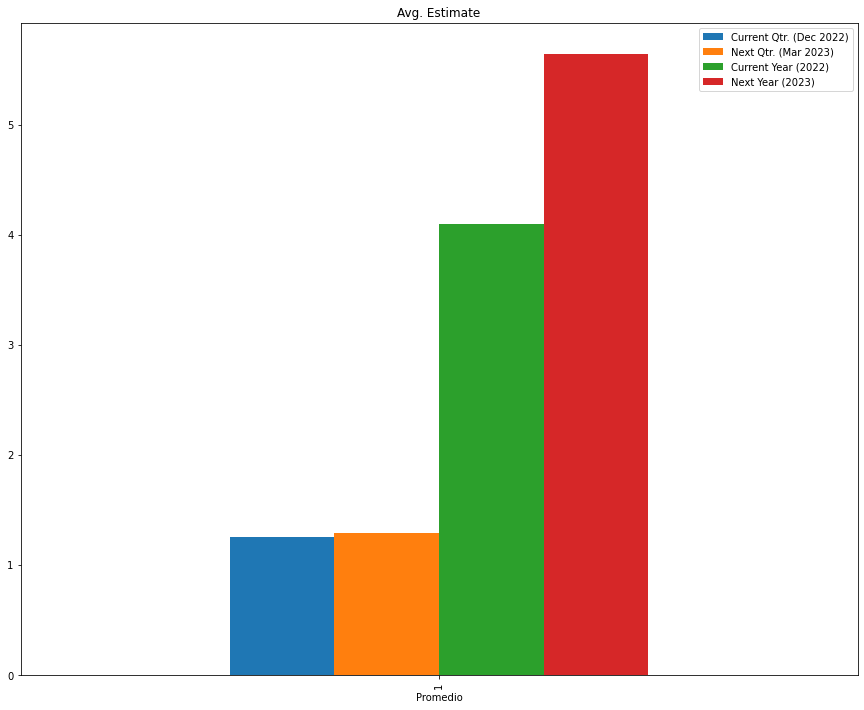

In [10]:
data_2.iloc[1:2].plot(kind='bar', figsize=(15,12))
plt.title('Avg. Estimate')
plt.xlabel('Promedio')
plt.show()

In [11]:
import yfinance as yf

In [12]:
data = yf.Ticker('TSLA')

In [13]:
print(data.info['profitMargins'])

0.14947


In [14]:
x = data.earnings
px.line(x)

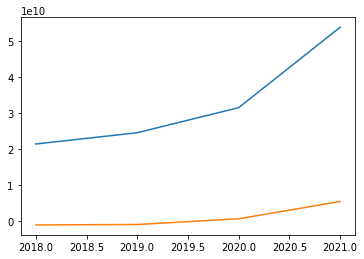

In [15]:
plt.plot(x)

In [16]:
print(data.major_holders)

        0                                      1
0  16.32%        % of Shares Held by All Insider
1  44.78%       % of Shares Held by Institutions
2  53.51%        % of Float Held by Institutions
3    3436  Number of Institutions Holding Shares


In [17]:
data.institutional_holders

,Holder,Shares,Date Reported,% Out,Value
0,"Vanguard Group, Inc. (The)",213024517,2022-09-29,0.0675,38384888238
1,Blackrock Inc.,171860959,2022-09-29,0.0544,30967626621
2,State Street Corporation,99647239,2022-09-29,0.0316,17955436238
3,Capital World Investors,90161776,2022-09-29,0.0286,16246250637
4,"Geode Capital Management, LLC",47495728,2022-09-29,0.0150,8558255344
5,Price (T.Rowe) Associates Inc,46956884,2022-09-29,0.0149,8461161042
6,"FMR, LLC",38428902,2022-09-29,0.0122,6924503945
7,Jennison Associates LLC,29557607,2022-09-29,0.0094,5325985277
8,Baillie Gifford and Company,27876833,2022-09-29,0.0088,5023126606
9,Northern Trust Corporation,26602278,2022-09-29,0.0084,4793464537


In [19]:
data.cashflow

,2021-12-31,2020-12-31,2019-12-31,2018-12-31
Investments,-1.320000e+08,-1.320000e+08,-1.320000e+08,-1.320000e+08
Change To Liabilities,5.371000e+09,2.423000e+09,1.447000e+09,2.203000e+09
Total Cashflows From Investing Activities,-7.868000e+09,-3.132000e+09,-1.436000e+09,-2.337000e+09
Net Borrowings,-5.732000e+09,-2.488000e+09,7.980000e+08,8.900000e+07
Total Cash From Financing Activities,-5.203000e+09,9.973000e+09,1.529000e+09,5.740000e+08
Change To Operating Activities,-3.014000e+09,-1.165000e+09,-1.000000e+09,-6.250000e+08
Issuance Of Stock,7.070000e+08,1.268600e+10,1.111000e+09,2.960000e+08
Net Income,5.519000e+09,7.210000e+08,-8.620000e+08,-9.760000e+08
Change In Cash,-1.757000e+09,1.311800e+10,2.506000e+09,3.120000e+08
Effect Of Exchange Rate,-1.830000e+08,3.340000e+08,8.000000e+06,-2.300000e+07


In [28]:
data_cencosud = yf.Ticker('CENCOSUD.SN')

In [21]:
data_cencosud.cashflow

,2021-12-31,2020-12-31,2019-12-31,2018-12-31
Change To Liabilities,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
Total Cashflows From Investing Activities,-1.277120e+11,-3.514789e+11,5.706851e+11,-2.574715e+11
Net Borrowings,-1.674567e+11,-9.140228e+11,-5.109452e+11,9.126356e+10
Total Cash From Financing Activities,-1.029320e+12,-1.161169e+12,-6.074145e+11,-2.155145e+11
Net Income,4.719102e+11,2.293061e+10,1.141096e+11,1.912852e+11
Change In Cash,1.247778e+11,-3.856316e+11,7.467396e+11,6.683716e+10
Repurchase Of Stock,-4.176576e+10,-4.176576e+10,-9.805715e+09,-9.805715e+09
Effect Of Exchange Rate,6.212932e+10,-2.025969e+10,1.922419e+10,-1.825501e+09
Total Cash From Operating Activities,1.219681e+12,1.147276e+12,7.642448e+11,5.416487e+11
Depreciation,2.503540e+11,3.427662e+11,2.855472e+11,1.773089e+11


<AxesSubplot:xlabel='Year'>

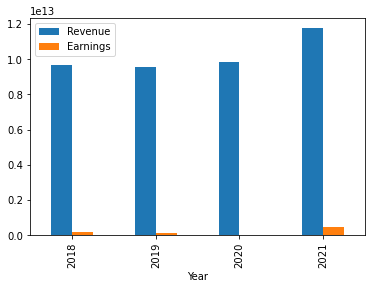

In [22]:
data_cencosud.earnings.plot(kind='bar')

In [35]:
data_cencosud.institutional_holders

In [36]:
data_cencosud.major_holders

,0,1
0,2.51%,% of Shares Held by All Insider
1,32.17%,% of Shares Held by Institutions
2,33.00%,% of Float Held by Institutions
3,193,Number of Institutions Holding Shares


In [37]:
x = data.recommendations
x = x[x.index > '2021-06-01']
print(x)

                                  Firm      To Grade From Grade Action
Date                                                                  
2021-06-14 13:55:22  Canaccord Genuity           Buy              main
2021-06-29 11:29:11                UBS       Neutral              main
2021-07-07 14:52:52          JP Morgan   Underweight              main
2021-07-27 10:54:46             Mizuho           Buy              main
2021-07-27 11:48:23        Wells Fargo  Equal-Weight              main
...                                ...           ...        ...    ...
2022-10-20 10:51:48        RBC Capital    Outperform              main
2022-10-20 11:34:48            Wedbush    Outperform              main
2022-10-20 11:46:08      Deutsche Bank           Buy              main
2022-10-20 13:26:44             Mizuho           Buy              main
2022-10-25 12:50:21     Morgan Stanley    Overweight              main

[104 rows x 4 columns]


# create a function that will take a ticker as its parameter, and output the ROE value for that ticker.

In [38]:
def ROE(ticker):
    data = yf.Ticker(ticker)
    roe = data.info['returnOnEquity']
    name = data.info['shortName']
    print(name, ':', roe)

In [39]:
ROE('AAPL')
#ROE('TSLA')
ROE('CENCOSUD.SN')

Apple Inc. : 1.75459
CENCOSUD SA : 0.087510005


In [ ]:
print(data.history(period='6mo'))
# Valid periods: 1d, 5d, 1mo, 3mo, 6mo, 1y, 2y, 5y, 10y, ytd, max. 

                  Open        High         Low       Close    Volume  \
Date                                                                   
2021-08-05  716.000000  720.950012  711.409973  714.630005  12919600   
2021-08-06  711.900024  716.330017  697.630005  699.099976  15576200   
2021-08-09  710.169983  719.030029  705.130005  713.760010  14715300   
2021-08-10  713.989990  716.590027  701.880005  709.989990  13432300   
2021-08-11  712.710022  715.179993  704.210022  707.820007   9800600   
...                ...         ...         ...         ...       ...   
2022-01-31  872.710022  937.989990  862.049988  936.719971  34812000   
2022-02-01  935.210022  943.700012  905.000000  931.250000  24379400   
2022-02-02  928.179993  931.500000  889.409973  905.659973  22264300   
2022-02-03  882.000000  937.000000  880.520020  891.140015  26285200   
2022-02-04  897.219971  936.500000  881.169983  923.320007  24472600   

            Dividends  Stock Splits  
Date                     

In [ ]:
data.history(start='2021-01-01', end='2021-03-31')

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2021-01-04,719.460022,744.489990,717.190002,729.770020,48638200,0,0
2021-01-05,723.659973,740.840027,719.200012,735.109985,32245200,0,0
2021-01-06,758.489990,774.000000,749.099976,755.979980,44700000,0,0
2021-01-07,777.630005,816.989990,775.200012,816.039978,51498900,0,0
2021-01-08,856.000000,884.489990,838.390015,880.020020,75055500,0,0
2021-01-11,849.400024,854.429993,803.619995,811.190002,59301600,0,0
2021-01-12,831.000000,868.000000,827.340027,849.440002,46270700,0,0
2021-01-13,852.760010,860.469971,832.000000,854.409973,33312500,0,0
2021-01-14,843.390015,863.000000,838.750000,845.000000,31266300,0,0


In [40]:
import plotly.graph_objects as go

In [41]:
stocks_price = data_cencosud.history(start='2021-01-01', end='2021-03-31')

In [42]:
stocks_price.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2021-01-04,991.781921,1006.434998,983.221459,991.781921,569074,0,0
2021-01-05,1021.859314,1025.715387,981.833259,1021.859314,457539,0,0
2021-01-06,1033.427612,1040.214339,1018.388927,1033.427612,795452,0,0
2021-01-07,1060.342896,1060.419998,1039.597205,1060.342896,1925313,0,0
2021-01-08,1087.412598,1087.412598,1041.139721,1087.412598,846153,0,0


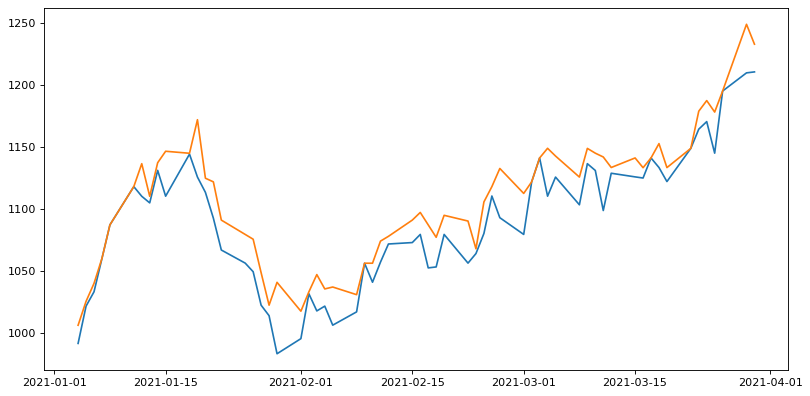

In [43]:
plt.figure(figsize=(12,6),dpi=80)
plt.plot(stocks_price.index, stocks_price['Close'])
plt.plot(stocks_price.index, stocks_price['High'])

In [44]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=stocks_price.index, y=stocks_price['Close'], name='Close Price'))
fig.add_trace(go.Scatter(x=stocks_price.index, y=stocks_price['High'], name='Higher Price'))

fig.update_layout(
    title_text='Stock Prices January - March 2021 CECONSUD'
)

# Stock return

In [45]:
tesla = yf.Ticker('TSLA')

In [46]:
price = tesla.history(period='1y')

In [47]:
x = price['Close'].pct_change()
print(x)

Date
2021-11-19         NaN
2021-11-22    0.017422
2021-11-23   -0.041353
2021-11-24    0.006285
2021-11-26   -0.030538
                ...   
2022-11-14   -0.025616
2022-11-15    0.018172
2022-11-16   -0.038576
2022-11-17   -0.020062
2022-11-18   -0.016269
Name: Close, Length: 252, dtype: float64


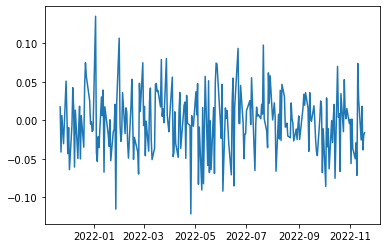

In [48]:
plt.plot(x)

In [49]:
px.line(x)

In [50]:
returns = (x+1).cumprod()

(array([10., 20., 39., 20., 40., 56., 17., 24., 19.,  6.]),
 array([0.46855048, 0.52721141, 0.58587235, 0.64453328, 0.70319422,
        0.76185515, 0.82051609, 0.87917702, 0.93783796, 0.99649889,
        1.05515983]),
 <BarContainer object of 10 artists>)

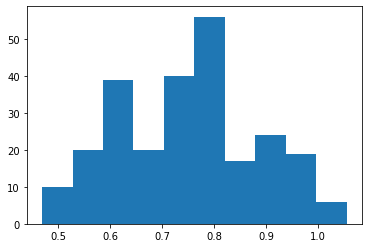

In [51]:
plt.hist(returns)

In [52]:
px.histogram(returns)

# Analyzing a Portfolio

In [53]:
stocks = ['AAPL','AMZN','MSFT','TSLA']
weights = [0.3,0.2,0.4,0.1]

In [54]:
data = yf.download(stocks, start='2021-01-01')

[*********************100%***********************]  4 of 4 completed


In [55]:
# daily return
x = data['Close'].pct_change()

In [56]:
# portfolio return
ret = (x*weights).sum(axis=1)

In [57]:
# total cumulative return
cumulative = (ret + 1).cumprod()

In [58]:
px.line(cumulative)

In [59]:
print(np.std(ret))

0.018778719254058357


In [60]:
annual_std = np.std(ret) * np.sqrt(252)
print(annual_std)

0.29810292651923265


# Portfolio Optimization

In [61]:
data = yf.download(stocks, start='2018-01-01')

[*********************100%***********************]  4 of 4 completed


In [62]:
data = data['Close']
x = data.pct_change()

In [63]:
# We are going to randomly assign a weight to each stock in our portfolio,
# and then calculate the metrics for that portfolio, including the Sharpe ratio. 

wts = np.random.uniform(size =len(x.columns))
wts = wts/np.sum(wts)

print(wts)

[0.06823594 0.13886925 0.40699937 0.38589544]


In [64]:
p_weights=[]
p_returns=[]
p_risk=[]
p_sharpe=[]

In [65]:
count = 500
for k in range(0,count):
    wts = np.random.uniform(size=len(x.columns))
    wts = wts/np.sum(wts)
    p_weights.append(wts)

    #returns
    mean_ret = (x.mean()*wts).sum()*252
    p_returns.append(mean_ret)

    #volatility
    ret = (x*wts).sum(axis=1)
    annual_std = np.std(ret)*np.sqrt(252)
    p_risk.append(annual_std)

    #sharpe ratio
    sharpe = (np.mean(ret)/np.std(ret))*np.sqrt(252)
    p_sharpe.append(sharpe)


In [66]:
max_ind = np.argmax(p_sharpe)
print(p_sharpe[max_ind])
print(p_weights[max_ind])

1.1283063637520347
[0.4371142  0.00102231 0.16773189 0.3941316 ]


In [67]:
grafico_max = pd.Series(p_weights[max_ind], index=x.columns)
px.bar(grafico_max)

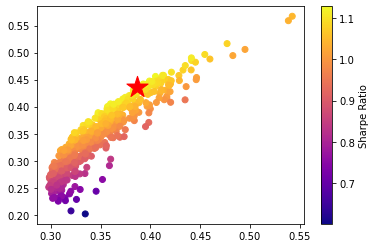

In [74]:
# The chart is called Efficient Frontier and shows the 
# returns on the Y-axis and volatility on the X-axis.
max_ind = np.argmax(p_sharpe)

plt.scatter(p_risk, p_returns, c=p_sharpe, cmap='plasma')
plt.colorbar(label='Sharpe Ratio')

plt.scatter(p_risk[max_ind], p_returns[max_ind], color='r', marker='*', s=500)
plt.show()

In [71]:
px.scatter(data_nueva, x='risk', y='return', color=p_sharpe)